# Project: Be a hero & save a pet today
## Team Name: In the Dawg Houz
### Team:  Emily Cogsgill, Marya Crigler,  Carlos Pisani, Stephen Schadt

## Dependencies

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import requests
import gmaps
import gmaps.datasets

from matplotlib import pyplot, pylab

## Local Data analysis

In [2]:
# Set filepaths
csv_filepath1 = "raw data/MergedData.csv"

In [3]:
# Read the csv files into new dataframe
df = pd.read_csv(csv_filepath1, encoding="iso-8859-1", low_memory=False)
df.head()

,Animal ID,Name_intake,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,Age upon Intake,Breed_intake,...,Sex_outcome,Female_outcome,Male_outcome,SpayNeuter_outcome,Purebred_outcome,NumAge_outcome,AgeUnits_outcome,AgeDays_outcome,Intake Outcome Days,IODays
0,A748291,*Madison,2017-05-01 14:26:00,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,...,Female,1.0,0.0,Yes,0,1.0,year,365.0,125 days 09:34:00.000000000,125.0
1,A750529,NaN,2017-05-28 13:22:00,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,...,Female,1.0,0.0,Yes,0,5.0,month,150.0,4 days 03:20:00.000000000,4.0
2,A730601,NaN,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,...,Male,0.0,1.0,Yes,0,7.0,month,210.0,0 days 20:49:00.000000000,0.0
3,A748238,NaN,2017-05-01 10:53:00,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,...,Male,0.0,1.0,Yes,0,3.0,year,1095.0,5 days 05:04:00.000000000,5.0
4,A683644,*Zoey,2014-07-13 11:02:00,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,...,Female,1.0,0.0,Yes,0,4.0,month,120.0,115 days 23:04:00.000000000,115.0


In [4]:
print(df.columns)

Index(['Animal ID', 'Name_intake', 'DateTime_intake', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type_intake',
       'Sex upon Intake', 'Age upon Intake', 'Breed_intake', 'Color_intake',
       'Month_intake', 'Year_intake', 'Sex_intake', 'Female_intake',
       'Male_intake', 'SpayNeuter_intake', 'Purebred_intake', 'NumAge_intake',
       'AgeUnits_intake', 'AgeDays_intake', 'Name_outcome', 'DateTime_outcome',
       'Date of Birth', 'Outcome Type', 'Outcome Subtype',
       'Animal Type_outcome', 'Sex upon Outcome', 'Age upon Outcome',
       'Breed_outcome', 'Color_outcome', 'Month_outcome', 'Year_outcome',
       'Sex_outcome', 'Female_outcome', 'Male_outcome', 'SpayNeuter_outcome',
       'Purebred_outcome', 'NumAge_outcome', 'AgeUnits_outcome',
       'AgeDays_outcome', 'Intake Outcome Days', 'IODays'],
      dtype='object')


In [5]:
# Get metrics on the raw outcomes file
df.describe()

,Month_intake,Year_intake,Female_intake,Male_intake,Purebred_intake,NumAge_intake,AgeDays_intake,Month_outcome,Year_outcome,Female_outcome,Male_outcome,Purebred_outcome,NumAge_outcome,AgeDays_outcome,IODays
count,57593.000000,57593.000000,57592.000000,57592.000000,57593.000000,57593.000000,57593.000000,57593.000000,57593.000000,57591.000000,57591.000000,57593.000000,57588.000000,57593.000000,57369.000000
mean,6.708697,2015.260709,0.462425,0.490294,0.048947,3.457382,742.241818,6.850589,2015.294480,0.462416,0.490302,0.048947,3.557599,756.069627,16.597588
std,3.210898,1.210101,0.498590,0.499910,0.215759,2.936187,1087.364762,3.262525,1.207164,0.498590,0.499910,0.215759,2.929233,1089.431333,37.431327
min,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,2014.000000,0.000000,0.000000,0.000000,1.000000,30.000000,4.000000,2014.000000,0.000000,0.000000,0.000000,2.000000,60.000000,1.000000
50%,7.000000,2015.000000,0.000000,0.000000,0.000000,2.000000,365.000000,7.000000,2015.000000,0.000000,0.000000,0.000000,2.000000,365.000000,5.000000
75%,9.000000,2016.000000,1.000000,1.000000,0.000000,4.000000,730.000000,10.000000,2016.000000,1.000000,1.000000,0.000000,5.000000,730.000000,14.000000
max,12.000000,2017.000000,1.000000,1.000000,1.000000,22.000000,8030.000000,12.000000,2017.000000,1.000000,1.000000,1.000000,22.000000,8030.000000,1101.000000


### General file statistics

In [6]:
#Metrics cont'd
data_recs = len(df)
data_AnimalTypes = df.groupby(["Animal Type_intake"]).size()
data_Sex = df.groupby(["Animal Type_intake", "Sex_intake"]).size()
data_Intake = df.groupby(["Animal Type_intake", "Intake Type"]).size()
data_Yearly = df.groupby(["Year_intake"]).size()
data_Yearly_Intake = df.groupby(["Animal Type_intake", "Intake Type", "Year_intake"]).size()
data_Monthly_Intake = df.groupby(["Animal Type_intake", "Intake Type", "Month_intake"]).size()
data_Outcome = df.groupby(["Animal Type_intake", "Outcome Type"]).size()

print(f"Number of records in Merged file: {data_recs}")
print(f"Number of Animal Type: {data_AnimalTypes}")
print(f"Number of Animals by Type and Sex: {data_Sex}")
print(f"Number of Animals by Type and Intake Reason: {data_Intake}")
print(f"Number of Animal Intakes by Year {data_Yearly}")
print(f"Number of Animals by Type and Outcome: {data_Outcome}")

Number of records in Merged file: 57593
Number of Animal Type: Animal Type_intake
Cat    25896
Dog    31697
dtype: int64
Number of Animals by Type and Sex: Animal Type_intake  Sex_intake 
Cat                 Female         11909
                    Male           11474
                    Unknown Sex     2513
Dog                 Female         14723
                    Male           16763
                    Unknown Sex      210
dtype: int64
Number of Animals by Type and Intake Reason: Animal Type_intake  Intake Type       
Cat                 Euthanasia Request       50
                    Owner Surrender        4313
                    Public Assist           558
                    Stray                 20975
Dog                 Euthanasia Request      169
                    Owner Surrender        4913
                    Public Assist          2736
                    Stray                 23879
dtype: int64
Number of Animal Intakes by Year Year_intake
2013     3406
2014    14723

In [7]:
#Filter out partial year data for 2013
df = df[df["Year_intake"]>2013]

#Verify data set yearly sample size
data_Yearly = df.groupby(["Year_intake"]).size()
print(f"Number of Animal Intakes by Year {data_Yearly}")

Number of Animal Intakes by Year Year_intake
2014    14723
2015    14590
2016    13198
2017    11676
dtype: int64


In [8]:
dogs_df = df[df["Animal Type_intake"]=="Dog"]
cats_df = df[df["Animal Type_intake"]=="Cat"]

## Number Intakes per Year

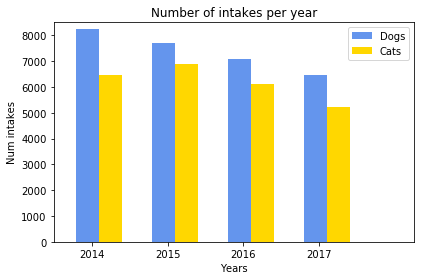

In [9]:
#Chart total intakes per year

dogsYrGrp = dogs_df.groupby(["Year_intake"], as_index=False)
dogsYrCnt = dogsYrGrp["Animal ID"].count()
dogsYears = dogsYrCnt["Year_intake"]
dogCnt = dogsYrCnt["Animal ID"]

catYrGrp = cats_df.groupby(["Year_intake"], as_index=False)
catYrCnt = catYrGrp["Animal ID"].count()
catCnt = catYrCnt["Animal ID"]

x_axis = np.arange(0, len(dogsYears), 1)
w = 0.3
plt.figure(figsize=(6,4))

plt.bar(x_axis-0.3, dogCnt,width=w,color='cornflowerblue',align='center', label="Dogs")
plt.bar(x_axis, catCnt,width=w,color='gold',align='center', label="Cats")
plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 8500)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per year")
plt.xlabel("Years")
plt.ylabel("Num intakes")

plt.legend(bbox_to_anchor=(1, 1), loc='upper right', ncol=1)

plt.tight_layout()
plt.savefig("figures/Intakes_Year.png")
plt.show()

## Number of Intakes per Year by Intake Type

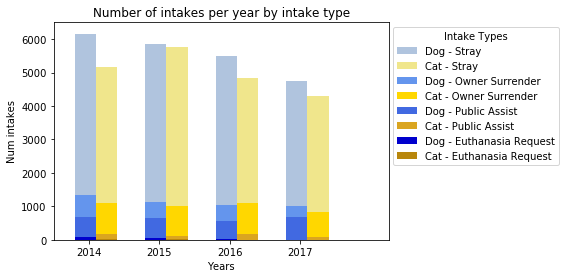

In [10]:
#Chart total intakes by type per year

Years = df["Year_intake"].unique()
intakeTypes = df["Intake Type"].unique()
dogColors = ["lightsteelblue","cornflowerblue","royalblue","mediumblue","darkblue","slateblue","blueviolet"]
catColors = ["khaki","gold","goldenrod","darkgoldenrod","darkkhaki","olive","darkolive"]
colorCnt = 0

plt.figure(figsize=(6,4))

for iType in intakeTypes:
    idogs_df = dogs_df[dogs_df["Intake Type"]==iType]
    dogsYrGrp = idogs_df.groupby(["Year_intake"], as_index=False)
    dogsYrCnt = dogsYrGrp["Animal ID"].count()
    dogCnt = dogsYrCnt["Animal ID"]
    
    icats_df = cats_df[cats_df["Intake Type"]==iType]
    catsYrGrp = icats_df.groupby(["Year_intake"], as_index=False)
    catsYrCnt = catsYrGrp["Animal ID"].count()
    catCnt = catsYrCnt["Animal ID"]
    
    x_axis = np.arange(0, len(Years), 1)
   
    plt.bar(x_axis-0.3, dogCnt,width=w,color=dogColors[colorCnt],align='center', label="Dog - "+iType)
    plt.bar(x_axis, catCnt,width=w,color=catColors[colorCnt],align='center', label="Cat - "+iType)
    colorCnt += 1

lgd=plt.legend(bbox_to_anchor=(1.525, 1), loc='upper right', ncol=1, title="Intake Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 6500)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per year by intake type")
plt.xlabel("Years")
plt.ylabel("Num intakes")

#plt.tight_layout()
plt.savefig("figures/Intakes_Type_Year.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Number of Intakes per Month

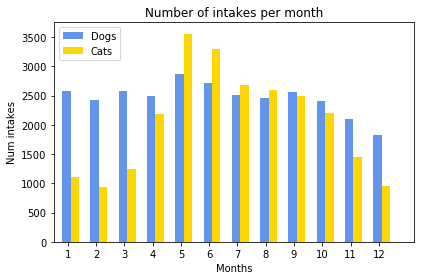

In [11]:
#Chart total intakes per Month of year

dogsMoGrp = dogs_df.groupby(["Month_intake"], as_index=False)
dogsMoCnt = dogsMoGrp["Animal ID"].count()
dogsMonths = dogsMoCnt["Month_intake"]
dogCnt = dogsMoCnt["Animal ID"]

catMoGrp = cats_df.groupby(["Month_intake"], as_index=False)
catMoCnt = catMoGrp["Animal ID"].count()
catCnt = catMoCnt["Animal ID"]

plt.figure(figsize=(6,4))
x_axis = np.arange(0, len(dogsMonths), 1)

plt.bar(x_axis-0.3, dogCnt,width=w,color='cornflowerblue',align='center', label="Dogs")
plt.bar(x_axis, catCnt,width=w,color='gold',align='center', label="Cats")
plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsMonths)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 3750)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per month")
plt.xlabel("Months")
plt.ylabel("Num intakes")

plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

plt.tight_layout()
plt.savefig("figures/Intakes_Month.png")
plt.show()

## Number of Intakes per Month by Intake Type

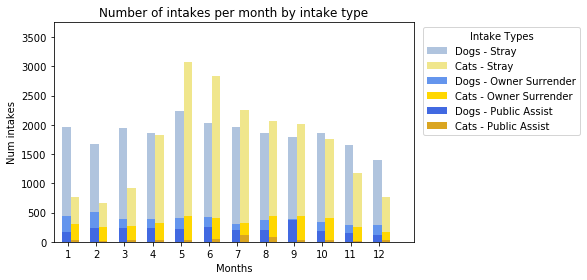

In [12]:
#Chart total intakes by type per month

MintakeTypes =["Stray","Owner Surrender", "Public Assist", ]
colorCnt = 0
plt.figure(figsize=(6,4))

for iType in MintakeTypes:
    idogs_df = dogs_df[dogs_df["Intake Type"]==iType]
    dogsMoGrp = idogs_df.groupby(["Month_intake"], as_index=False)
    dogsMoCnt = dogsMoGrp["Animal ID"].count()
    dogsMonths = dogsMoCnt["Month_intake"]
    dogCnt = dogsMoCnt["Animal ID"]
    
    icats_df = cats_df[cats_df["Intake Type"]==iType]
    catMoGrp = icats_df.groupby(["Month_intake"], as_index=False)
    catMoCnt = catMoGrp["Animal ID"].count()
    catCnt = catMoCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsMonths), 1)

    plt.bar(x_axis-0.3, dogCnt,width=w,color=dogColors[colorCnt],align='center', label="Dogs - "+iType)
    plt.bar(x_axis, catCnt,width=w,color=catColors[colorCnt],align='center', label="Cats - "+iType)
   
    colorCnt += 1

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value-0.25 for value in x_axis]
plt.xticks(tick_locations, dogsMonths)

# Set the limits of the x axis
plt.xlim(-.75, len(x_axis))

# Set the limits of the y axis
plt.ylim(0, 3750)

# Give the chart a title, x label, and y label
plt.title(f"Number of intakes per month by intake type")
plt.xlabel("Months")
plt.ylabel("Num intakes")

lgd=plt.legend(bbox_to_anchor=(1.475, 1), loc='upper right', ncol=1, title="Intake Types")

plt.tight_layout()
plt.savefig("figures/Intakes_Type_Month.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Number of Outcomes per Year by Outcome Type

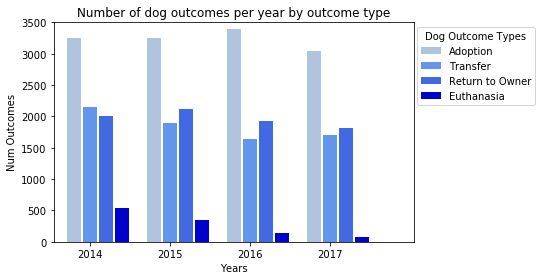

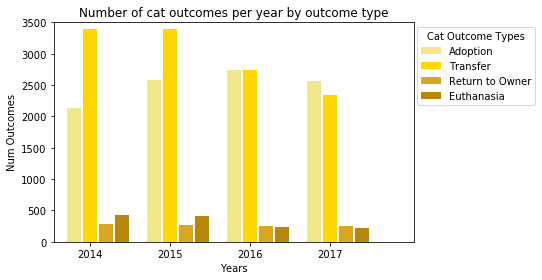

In [13]:
#Chart total outcomes by type per year

Years = df["Year_outcome"].unique()
outcomeTypes = ["Adoption","Transfer","Return to Owner","Euthanasia"]

colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    idogs_df = dogs_df[dogs_df["Outcome Type"]==iType]
    dogsYrGrp = idogs_df.groupby(["Year_outcome"], as_index=False)
    dogsYrCnt = dogsYrGrp["Animal ID"].count()
    dogsYears = dogsYrCnt["Year_outcome"]
    dogCnt = dogsYrCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsYears), 1)
   
    plt.bar(x_axis+w, dogCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    #plt.bar(x_axis, catCnt,width=w,color=catColors[colorCnt],align='center', label="Cat - "+iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 3500)

# Give the chart a title, x label, and y label
plt.title(f"Number of dog outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Dog_Year.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


# --- Cats  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    icats_df = cats_df[cats_df["Outcome Type"]==iType]
    catsYrGrp = icats_df.groupby(["Year_outcome"], as_index=False)
    catsYrCnt = catsYrGrp["Animal ID"].count()
    catsYears = catsYrCnt["Year_outcome"]
    catCnt = catsYrCnt["Animal ID"]
        
    x_axis = np.arange(0, len(catsYears), 1)
   
    plt.bar(x_axis+w, catCnt,width=0.175,color=catColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Cat Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 3500)

# Give the chart a title, x label, and y label
plt.title(f"Number of cat outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Cat_Year.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Number of Outcomes per Month by Outcome Type

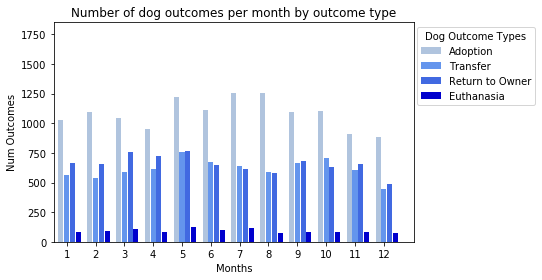

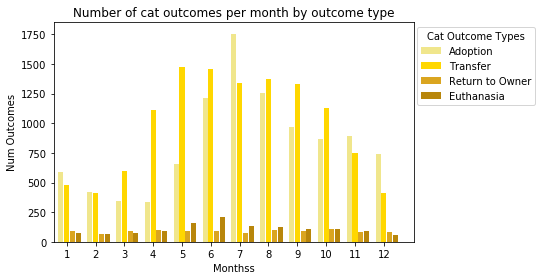

In [14]:
#Chart total outcomes by type per month

Months = df["Month_outcome"].unique()
outcomeTypes = ["Adoption","Transfer","Return to Owner","Euthanasia"]

colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    idogs_df = dogs_df[dogs_df["Outcome Type"]==iType]
    dogsMoGrp = idogs_df.groupby(["Month_outcome"], as_index=False)
    dogsMoCnt = dogsMoGrp["Animal ID"].count()
    dogsMonths = dogsMoCnt["Month_outcome"]
    dogCnt = dogsMoCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsMonths), 1)
   
    plt.bar(x_axis+w, dogCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsMonths)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 1850)

# Give the chart a title, x label, and y label
plt.title(f"Number of dog outcomes per month by outcome type")
plt.xlabel("Months")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Dog_Month.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


# --- Cats  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    icats_df = cats_df[cats_df["Outcome Type"]==iType]
    catsMoGrp = icats_df.groupby(["Month_outcome"], as_index=False)
    catsMoCnt = catsMoGrp["Animal ID"].count()
    catsMonths = catsMoCnt["Month_outcome"]
    catCnt = catsMoCnt["Animal ID"]
        
    x_axis = np.arange(0, len(catsMonths), 1)
   
    plt.bar(x_axis+w, catCnt,width=0.175,color=catColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Cat Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, catsMonths)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 1850)

# Give the chart a title, x label, and y label
plt.title(f"Number of cat outcomes per month by outcome type")
plt.xlabel("Monthss")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Cat_Month.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Average Number of Days between Intake and Outcome by Outcome Type

Adoption    Year_outcome     IODays
0          2014  20.660215
1          2015  22.893231
2          2016  25.807885
3          2017  22.886259
Transfer    Year_outcome     IODays
0          2014  10.854944
1          2015  10.922085
2          2016  13.532515
3          2017   9.853586
Return to Owner    Year_outcome    IODays
0          2014  3.202891
1          2015  2.956377
2          2016  3.011936
3          2017  2.896169
Euthanasia    Year_outcome     IODays
0          2014   8.310536
1          2015   7.505714
2          2016  24.422222
3          2017  16.742857


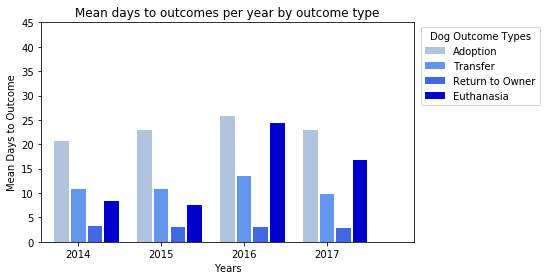

Adoption    Year_outcome     IODays
0          2014  30.577049
1          2015  38.731650
2          2016  43.099526
3          2017  39.520016
Transfer    Year_outcome    IODays
0          2014  4.867477
1          2015  5.728187
2          2016  6.991547
3          2017  7.782057
Return to Owner    Year_outcome    IODays
0          2014  4.076655
1          2015  3.736264
2          2016  4.263566
3          2017  3.777328
Euthanasia    Year_outcome     IODays
0          2014   3.943128
1          2015   4.788462
2          2016  12.267544
3          2017  12.201794


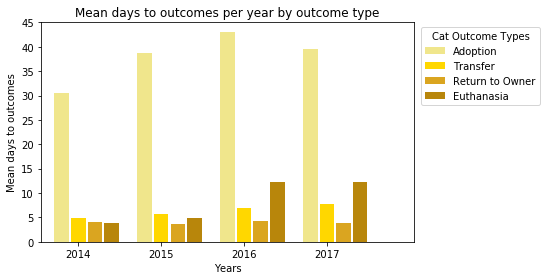

In [15]:
#Chart days from intake to outcome by outcome type

outcomeTypes = ["Adoption","Transfer","Return to Owner","Euthanasia"]

colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    IOdogs_df = dogs_df[dogs_df["Outcome Type"]==iType]
    IOdogsYrGrp = IOdogs_df.groupby(["Year_outcome"], as_index=False)
    IOdogsDaysCnt = IOdogsYrGrp["IODays"].mean()
    IOdogsYears = IOdogsDaysCnt["Year_outcome"]
    IOdogCnt = IOdogsDaysCnt["IODays"]
    print(f"{iType} {IOdogsDaysCnt}")  
    x_axis = np.arange(0, len(dogsYears), 1)
   
    plt.bar(x_axis+w, IOdogCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
     
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 45)

# Give the chart a title, x label, and y label
plt.title(f"Mean days to outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Mean Days to Outcome")

plt.tight_layout()
plt.savefig("figures/Days_Outcomes_Dog_Year.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


# --- Cats  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,4))

for iType in outcomeTypes:
    IOcats_df = cats_df[cats_df["Outcome Type"]==iType]
    IOcatsYrGrp = IOcats_df.groupby(["Year_outcome"], as_index=False)
    IOcatsDaysCnt = IOcatsYrGrp["IODays"].mean()
    IOcatsYears = IOcatsDaysCnt["Year_outcome"]
    IOcatCnt = IOcatsDaysCnt["IODays"]
    print(f"{iType} {IOcatsDaysCnt}")   
    x_axis = np.arange(0, len(catsYears), 1)
   
    plt.bar(x_axis+w, IOcatCnt,width=0.175,color=catColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Cat Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, IOcatsYears)

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 45)

# Give the chart a title, x label, and y label
plt.title(f"Mean days to outcomes per year by outcome type")
plt.xlabel("Years")
plt.ylabel("Mean days to outcomes")

plt.tight_layout()
plt.savefig("figures/Days_Outcomes_Cat_Year.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

### Create Top 10 Purebred dataframe

In [16]:
purebred_df = df[df["Purebred_intake"]==1]
purebred_df.head()

,Animal ID,Name_intake,DateTime_intake,Found Location,Intake Type,Intake Condition,Animal Type_intake,Sex upon Intake,Age upon Intake,Breed_intake,...,Sex_outcome,Female_outcome,Male_outcome,SpayNeuter_outcome,Purebred_outcome,NumAge_outcome,AgeUnits_outcome,AgeDays_outcome,Intake Outcome Days,IODays
28,A678576,Han Solo,2014-05-10 13:27:00,Ih 35 And Riverside Dr in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Miniature Pinscher,...,Male,0.0,1.0,No,1,2.0,year,730.0,6 days 19:05:00.000000000,6.0
123,A738363,Sadie,2016-11-13 15:38:00,3300 Killingsworth in Travis (TX),Stray,Normal,Dog,Spayed Female,8 years,Beagle,...,Female,1.0,0.0,Yes,1,8.0,year,2920.0,0 days 03:07:00.000000000,0.0
140,A545301,Audie,2015-08-04 14:13:00,Austin (TX),Owner Surrender,Normal,Cat,Spayed Female,8 years,Maine Coon,...,Female,1.0,0.0,Yes,1,8.0,year,2920.0,19 days 04:28:00.000000000,19.0
161,A735361,Maya,2016-09-23 13:28:00,5400 Pecan Brook in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Labrador Retriever,...,Female,1.0,0.0,Yes,1,2.0,year,730.0,24 days 10:32:00.000000000,24.0
214,A708837,Yaya Annie,2015-08-01 12:21:00,9802 Roxanna Drive in Austin (TX),Stray,Nursing,Cat,Intact Female,1 year,Domestic Medium Hair,...,Female,1.0,0.0,Yes,1,1.0,year,365.0,57 days 02:49:00.000000000,57.0


In [17]:
purebredDogGrp_df = purebred_df[purebred_df["Animal Type_intake"]=="Dog"].groupby(["Breed_intake"], as_index=False)
purebredDogCnt_df=purebredDogGrp_df["Animal ID"].count()
sort_purebredDogCnt_df = purebredDogCnt_df.sort_values("Animal ID", ascending=False)[:10]
sort_purebredDogCnt_df


,Breed_intake,Animal ID
81,Labrador Retriever,143
103,Pit Bull,142
43,Chihuahua Shorthair,139
65,German Shepherd,133
119,Shih Tzu,91
50,Dachshund,81
113,Rottweiler,64
28,Boxer,64
120,Siberian Husky,62
8,Australian Cattle Dog,60


In [18]:
# Percent of purebred 
pctPurebredDogs = (len(purebred_df[purebred_df["Animal Type_intake"]=="Dog"])/len(dogs_df))
pctPurebredCats = (len(purebred_df[purebred_df["Animal Type_intake"]=="Cat"])/len(cats_df))
print(f"The percent of dogs that are purebred is: " +"{:.2%}".format(pctPurebredDogs) )
print(f"The percent of cats that are purebred is: " +"{:.2%}".format(pctPurebredCats) )

The percent of dogs that are purebred is: 6.97%
The percent of cats that are purebred is: 2.31%


## Number of Intakes per Year for Top 10 Purebreds by Intake Type

C:\Users\marya\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


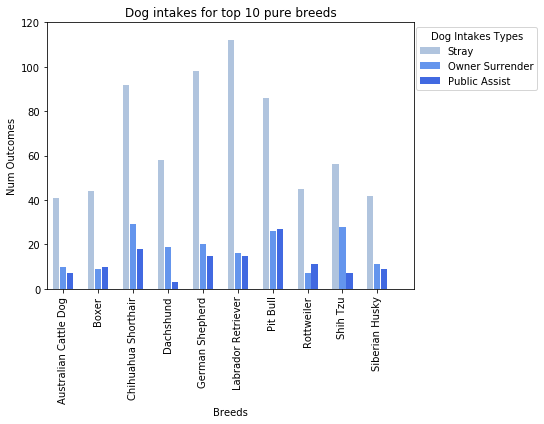

In [19]:

# --- Intakes top 10 Pure bred by intake  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,6))
bintakeTypes = ["Stray","Owner Surrender","Public Assist"]
breeds = sort_purebredDogCnt_df["Breed_intake"]
b1dogs_df = pd.DataFrame(dogs_df[dogs_df["Breed_intake"].isin(breeds)])


for iType in bintakeTypes:
    bdogs_df = b1dogs_df[dogs_df["Intake Type"]==iType]
    dogsBreedGrp = bdogs_df.groupby(["Breed_intake"], as_index=False)
    dogsBreedCnt = dogsBreedGrp["Animal ID"].count()
    dogsBreeds = dogsBreedCnt["Breed_intake"]
    dogBCnt = dogsBreedCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsBreeds), 1)
   
    plt.bar(x_axis+w, dogBCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Intakes Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsBreeds,rotation='vertical')

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 120)

# Give the chart a title, x label, and y label
plt.title(f"Dog intakes for top 10 pure breeds")
plt.xlabel("Breeds")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Intakes_Dog_Breed.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Number of Outcomes for Top 10 Purebreds by Outcome Type

C:\Users\marya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


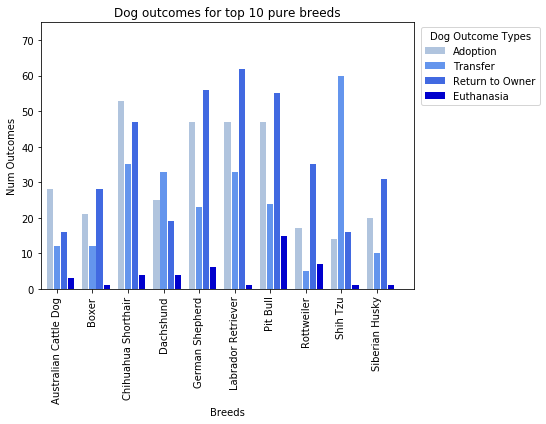

In [20]:
# --- Pure bred by outcomes  ---
colorCnt = 0
w=0
plt.figure(figsize=(6,6))

breeds = sort_purebredDogCnt_df["Breed_intake"]
b1dogs_df = dogs_df[dogs_df["Breed_intake"].isin(breeds)]

for iType in outcomeTypes:
    bdogs_df = b1dogs_df[dogs_df["Outcome Type"]==iType]
    dogsBreedGrp = bdogs_df.groupby(["Breed_outcome"], as_index=False)
    dogsBreedCnt = dogsBreedGrp["Animal ID"].count()
    dogsBreeds = dogsBreedCnt["Breed_outcome"]
    dogBCnt = dogsBreedCnt["Animal ID"]
    
    x_axis = np.arange(0, len(dogsBreeds), 1)
   
    plt.bar(x_axis+w, dogBCnt,width=0.175,color=dogColors[colorCnt],align='center', label=iType)
    colorCnt += 1
    w+=0.2

lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value+0.2 for value in x_axis]
plt.xticks(tick_locations, dogsBreeds,rotation='vertical')

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 75)

# Give the chart a title, x label, and y label
plt.title(f"Dog outcomes for top 10 pure breeds")
plt.xlabel("Breeds")
plt.ylabel("Num Outcomes")

plt.tight_layout()
plt.savefig("figures/Outcomes_Dog_Breed.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

## Average Number of Days for Purebread to be Reclaimed by Owner

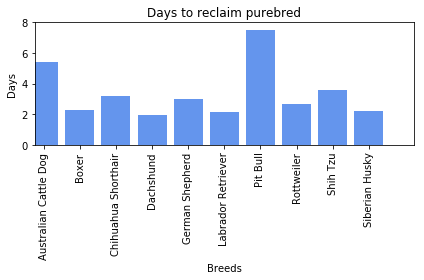

In [21]:
#Time for strays to be claimed by owner

#convert intake outcome days to numerical value for calculations
def get_days_length(val):
    val = str(val)
    days = re.findall('\d*',val)[0]
    return days

rdogs_df = b1dogs_df[b1dogs_df["Outcome Type"]=="Return to Owner"]

rdogsGrp = rdogs_df.groupby(["Breed_outcome"], as_index=False)
rdogsBreedCnt = rdogsGrp["IODays"].mean()
rdogsBreeds = rdogsBreedCnt["Breed_outcome"]
rdogsCnt = rdogsBreedCnt["IODays"]
    
x_axis = np.arange(0, len(rdogsBreeds), 1)
   
plt.bar(x_axis, rdogsCnt,color="cornflowerblue",align='center', label=iType)

#lgd=plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', ncol=1, title="Dog Outcome Types") 

plt.autoscale(tight=True)

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, rdogsBreeds,rotation='vertical')

# Set the limits of the x axis
plt.xlim(-.25, len(x_axis)+.25)

# Set the limits of the y axis
plt.ylim(0, 8)

# Give the chart a title, x label, and y label
plt.title(f"Days to reclaim purebred")
plt.xlabel("Breeds")
plt.ylabel("Days")

plt.tight_layout()
plt.savefig("figures/DaysReclaim_Breed.png",bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()


In [22]:
rdogsBreedCnt

,Breed_outcome,IODays
0,Australian Cattle Dog,5.437500
1,Boxer,2.285714
2,Chihuahua Shorthair,3.170213
3,Dachshund,1.947368
4,German Shepherd,3.000000
5,Labrador Retriever,2.112903
6,Pit Bull,7.472727
7,Rottweiler,2.657143
8,Shih Tzu,3.562500
9,Siberian Husky,2.193548


## Changes to Spay and Neuter Status between Intake and Outcome
#### .....because Robin Choi loves Pie Charts

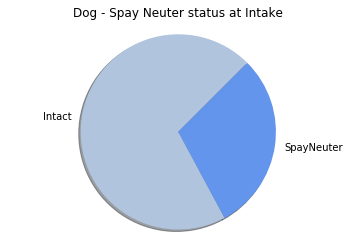

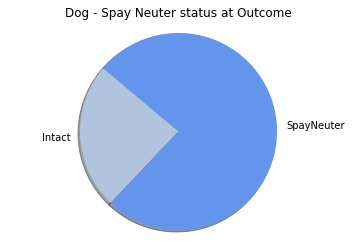

In [23]:
#Change of spay neuter --Dogs

fixedInDogGrp=dogs_df.groupby(["SpayNeuter_intake"])
fixedInDogCnt = fixedInDogGrp["Animal ID"].count()/len(dogs_df)
fixedOutDogGrp=dogs_df.groupby(["SpayNeuter_outcome"])
fixedOutDogCnt = fixedOutDogGrp["Animal ID"].count()/len(dogs_df)
#fixedOutDogCnt
plt.pie(fixedInDogCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["lightsteelblue","cornflowerblue"] , shadow=True, startangle=45)
plt.axis("equal")
plt.title(f"Dog - Spay Neuter status at Intake")
plt.savefig("figures/SpayNeuter_intake_Dog.png")
plt.show()

plt.pie(fixedOutDogCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["lightsteelblue","cornflowerblue"], shadow=True, startangle=140 )
plt.axis("equal")
plt.title(f"Dog - Spay Neuter status at Outcome")
plt.savefig("figures/SpayNeuter_outcome_Dog.png")            
plt.show()


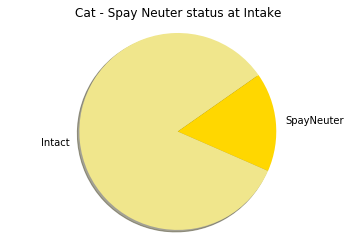

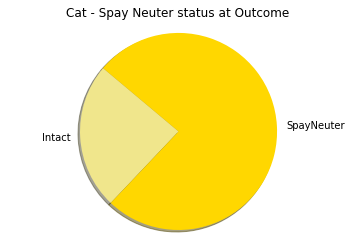

In [24]:
#Change of spay neuter --Cats

fixedInCatGrp=cats_df.groupby(["SpayNeuter_intake"])
fixedInCatCnt = fixedInCatGrp["Animal ID"].count()
fixedOutCatGrp=dogs_df.groupby(["SpayNeuter_outcome"])
fixedOutCatCnt = fixedOutCatGrp["Animal ID"].count()
#fixedOutCatCnt
plt.pie(fixedInCatCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["khaki","gold"] , shadow=True, startangle=35)
plt.axis("equal")
plt.title(f"Cat - Spay Neuter status at Intake")
plt.savefig("figures/SpayNeuter_intake_Cat.png")
plt.show()

plt.pie(fixedOutCatCnt,explode=(0,0), labels=["Intact","SpayNeuter"], colors=["khaki","gold"], shadow=True, startangle=140 )
plt.axis("equal")
plt.title(f"Cat - Spay Neuter status at Outcome")
plt.savefig("figures/SpayNeuter_outcome_Cat.png" )           
plt.show()

## Austin Location Analysis

### Google Maps Heat Map Visualizations 
#### Intakes - All

In [2]:
# Set Google API key value
from config import gkey
gmaps.configure(api_key=gkey)

In [3]:
# Read in All animals address counts CSV 
df_summary_all = pd.read_csv('raw data/animal_shelter_analysis_address_counts_ALL.csv', encoding='latin-1')

In [4]:
#
# *** Overview Map ***
#
# Initialize our map figure
fig1 = gmaps.figure(center=(30.3, -97.74), zoom_level=10)

# Apply our heatmap of ALL animals to the figure and output it
heatmap_layer = gmaps.heatmap_layer(df_summary_all[["Latitude", "Longitude"]], weights=df_summary_all["Count"])

# Apply heatmap_layer to figure
fig1.add_layer(heatmap_layer)

# Tweak heatmap intensity radius coloring
heatmap_layer.max_intensity = 19
heatmap_layer.point_radius = 5

# Output figure
fig1

Figure()

In [5]:
# *** Zoomed Map ***
#
# Initialize our map figure
fig2 = gmaps.figure(center=(30.3, -97.74), zoom_level=11)

# Apply heatmap_layer to figure
fig2.add_layer(heatmap_layer)

# Tweak heatmap intensity radius coloring
heatmap_layer.max_intensity = 12
heatmap_layer.point_radius = 6

# Output figure
fig2

Figure()

#### Intakes - Animals from homes

In [6]:
# Read in animals-in-homes address counts CSV 
df_summary_homes = pd.read_csv('raw data/animal_shelter_analysis_address_counts_HOMES.csv', encoding='latin-1')

In [7]:
# *** Overview Map ***
#
# Initialize our map figure
fig1 = gmaps.figure(center=(30.3, -97.74), zoom_level=10)

# Apply our heatmap of ALL animals to the figure and output it
heatmap_layer_homes = gmaps.heatmap_layer(df_summary_homes[["Latitude", "Longitude"]], weights=df_summary_homes["Count"])

# Apply heatmap_layer to figure
fig1.add_layer(heatmap_layer_homes)

# Tweak heatmap intensity radius coloring
heatmap_layer_homes.max_intensity = 19
heatmap_layer_homes.point_radius = 5

# Output figure
fig1

Figure()

In [8]:
# *** Zoomed Map ***
#
# Initialize our map figure
fig2 = gmaps.figure(center=(30.3, -97.74), zoom_level=11)

# Apply heatmap_layer to figure
fig2.add_layer(heatmap_layer_homes)

# Tweak heatmap intensity radius coloring
heatmap_layer_homes.max_intensity = 12
heatmap_layer_homes.point_radius = 6

# Output figure
fig2

Figure()

#### Intakes - Dogs

In [9]:
# Read in Dogs address counts CSV 
df_summary_dogs = pd.read_csv('raw data/animal_shelter_analysis_address_counts_DOGS.csv', encoding='latin-1')

In [10]:
# *** Overview Map ***
#
# Initialize our map figure
fig1 = gmaps.figure(center=(30.3, -97.74), zoom_level=10)

# Apply our heatmap of ALL animals to the figure and output it
heatmap_layer_dogs = gmaps.heatmap_layer(df_summary_dogs[["Latitude", "Longitude"]], weights=df_summary_dogs["Count"])

# Apply heatmap_layer to figure
fig1.add_layer(heatmap_layer_dogs)

# Tweak heatmap intensity radius coloring
heatmap_layer_dogs.max_intensity = 19
heatmap_layer_dogs.point_radius = 5

# Output figure
fig1

Figure()

In [11]:
# *** Zoomed Map ***
#
# Initialize our map figure
fig2 = gmaps.figure(center=(30.3, -97.74), zoom_level=11)

# Apply heatmap_layer to figure
fig2.add_layer(heatmap_layer_dogs)

# Tweak heatmap intensity radius coloring
heatmap_layer_dogs.max_intensity = 12
heatmap_layer_dogs.point_radius = 6

# Output figure
fig2

Figure()

#### Intakes - Cats

In [12]:
# Read in animals-in-homes address counts CSV 
df_summary_cats = pd.read_csv('raw data/animal_shelter_analysis_address_counts_CATS.csv', encoding='latin-1')

In [13]:
# *** Overview Map ***
#
# Initialize our map figure
fig1 = gmaps.figure(center=(30.3, -97.74), zoom_level=10)

# Apply our heatmap of ALL animals to the figure and output it
heatmap_layer_cats = gmaps.heatmap_layer(df_summary_cats[["Latitude", "Longitude"]], weights=df_summary_cats["Count"])

# Apply heatmap_layer to figure
fig1.add_layer(heatmap_layer_cats)

# Tweak heatmap intensity radius coloring
heatmap_layer_cats.max_intensity = 19
heatmap_layer_cats.point_radius = 5

# Output figure
fig1

Figure()

In [14]:
# *** Zoomed Map ***
#
# Initialize our map figure
fig2 = gmaps.figure(center=(30.3, -97.74), zoom_level=11)

# Apply heatmap_layer to figure
fig2.add_layer(heatmap_layer_cats)

# Tweak heatmap intensity radius coloring
heatmap_layer_cats.max_intensity = 12
heatmap_layer_cats.point_radius = 6

# Output figure
fig2

Figure()

 #### Intakes - Strays

In [15]:
# Read in animals-in-homes address counts CSV 
df_summary_strays = pd.read_csv('raw data/animal_shelter_analysis_address_counts_STRAYS.csv', encoding='latin-1')

In [16]:
# *** Overview Map ***
#
# Initialize our map figure
fig1 = gmaps.figure(center=(30.3, -97.74), zoom_level=10)

# Apply our heatmap of ALL animals to the figure and output it
heatmap_layer_strays = gmaps.heatmap_layer(df_summary_strays[["Latitude", "Longitude"]], weights=df_summary_strays["Count"])

# Apply heatmap_layer to figure
fig1.add_layer(heatmap_layer_strays)

# Tweak heatmap intensity radius coloring
heatmap_layer_strays.max_intensity = 19
heatmap_layer_strays.point_radius = 5

# Output figure
fig1

Figure()

In [17]:
# *** Zoomed Map ***
#
# Initialize our map figure
fig2 = gmaps.figure(center=(30.3, -97.74), zoom_level=11)

# Apply heatmap_layer to figure
fig2.add_layer(heatmap_layer_strays)

# Tweak heatmap intensity radius coloring
heatmap_layer_strays.max_intensity = 12
heatmap_layer_strays.point_radius = 6

# Output figure
fig2

Figure()

### Google Maps Point Plot: Intake addresses of dogs vs. cats (from homes)

In [18]:
# Dogs from homes
df_animals_summary_dogsfromhomes = df_summary_dogs.loc[(df_summary_dogs["Pet at Home"] == True),]

# Cats from homes
df_animals_summary_catsfromhomes = df_summary_cats.loc[(df_summary_cats["Pet at Home"] == True),]

In [19]:
# Create dataframes for lat/long values for dogs & cats, and break into list of tuples
df_latlong_dogs = df_animals_summary_dogsfromhomes[["Latitude", "Longitude"]]
df_latlong_cats = df_animals_summary_catsfromhomes[["Latitude", "Longitude"]]
dogs_latlong_tuples = [tuple(x) for x in df_latlong_dogs.values]
cats_latlong_tuples = [tuple(x) for x in df_latlong_cats.values]

In [20]:
# Plot points representing just dogs and cats (colored separately)
dogs_layer = gmaps.symbol_layer(dogs_latlong_tuples, fill_color="#0000FF", stroke_color="#0000FF", scale=2)
cats_layer = gmaps.symbol_layer(cats_latlong_tuples, fill_color="#FF1493", stroke_color="#FF1493", scale=2)

# Initialize map figure
fig = gmaps.figure(center=(30.27, -97.74), zoom_level=11)

# Add layers for dogs, then cats (dogs blue, cats magenta)
fig.add_layer(dogs_layer)
fig.add_layer(cats_layer)
fig

Figure()

### Scatter plot: Veterinarian count vs. Pet intake address count

In [21]:
# Read All Animals summary dataframe with Vet
df_animals_summary_all = pd.read_csv('raw data/animal_shelter_analysis_with_VetAndRadius_data.csv', encoding='latin-1')

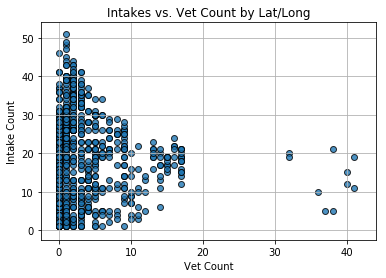

In [22]:
# Build a scatter plot for each data type
plt.scatter(df_animals_summary_all["Vet Count"], 
            df_animals_summary_all["Intakes within Radius"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="")

# Incorporate the other graph properties
plt.title("Intakes vs. Vet Count by Lat/Long")
plt.ylabel("Intake Count")
plt.xlabel("Vet Count")
plt.grid(True)
plt.xlim([-2.5, max(df_animals_summary_all["Vet Count"]) + 3])
plt.ylim([-2.5, max(df_animals_summary_all["Intakes within Radius"] + 3)])

# Save the figure
plt.savefig("intakes_vs_get_count_by_latlng.png")

# Show plot
plt.show()

## Austin vs Louisville Analysis

In [24]:
#Read in the datasets
austin_df = pd.read_csv("raw data/Austin_merged_data_with_time_deltas.csv", encoding="iso-8859-1", low_memory=False)
louisville_df = pd.read_csv("raw data/Louisville_with_time_deltas_dogs_cats_only.csv", encoding="iso-8859-1", low_memory=False)

austin_df['City']='Austin'
louisville_df['City']='Louisville'

## Average Time-To-Outcome by Animal Type

In [25]:
austin_data=austin_df.loc[:,['Days from Intake to Outcome','Animal Type_intake']]
louisville_data=louisville_df.loc[:,['Days between Intake and Outcome','AnimalType']]

austin_data=austin_data.rename(columns={"Animal Type_intake":"Animal Type"})
louisville_data=louisville_data.rename(columns={"AnimalType":"Animal Type","Days between Intake and Outcome":"Days from Intake to Outcome"})
austin_data['City']='Austin'
louisville_data['City']='Louisville'
df=pd.concat([austin_data,louisville_data]).reset_index()

#Get the outcome types to be named the same things across AUS and Louisville data

df=df.replace(to_replace='DOG',value='Dog')
df=df.replace(to_replace='CAT',value='Cat')

#include only data for Dogs and Cats
group_by_animal_type=df.groupby(df['Animal Type'])

#count up total dogs and cats
df['Animal Type'].value_counts()

#create lists for boxplot showing intake times for cats vs dogs

cats=[]
dogs=[]

for row in range(len(df)):
    if (df.loc[row,'Animal Type']=="Cat") & (df.loc[row,'Days from Intake to Outcome']>0):
        cats.append(df.loc[row,'Days from Intake to Outcome'])
    elif (df.loc[row,'Animal Type']=="Dog") & (df.loc[row,'Days from Intake to Outcome']>0):
        dogs.append(df.loc[row,'Days from Intake to Outcome'])
    else:
        continue

In [26]:
%%capture

#set up the figure
data=[cats,dogs]
labels=['Cats','Dogs']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by Animal Type (Cats vs Dogs)')
pylab.xlabel("Animal Type")
pylab.ylabel("Days from Intake to Outcome")

Mean values:
Cats: 15.462
Dogs: 14.044

Standard Deviations:
Cats: 34.421
Dogs: 37.595

Medians:
Cats: 5.857
Dogs: 5.983


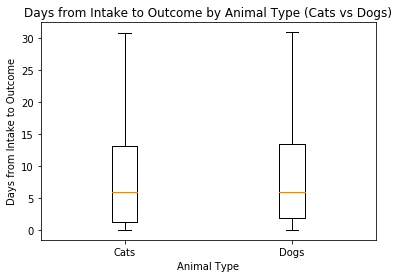

In [27]:
#save box and whiskers plot to PNG file
pyplot.savefig('figures/time_to_outcome_by_animal_type.png')

print(f"Mean values:\nCats: {round(np.mean(cats),3)}\nDogs: {round(np.mean(dogs),3)}\n")
print(f"Standard Deviations:\nCats: {round(np.std(cats),3)}\nDogs: {round(np.std(dogs),3)}\n")
print(f"Medians:\nCats: {round(np.median(cats),3)}\nDogs: {round(np.median(dogs),3)}")

#show box and whiskers plot
pyplot.show()

## Average Time-To-Outcome by City

In [28]:
louisville_df.head()

,Unnamed: 0,AnimalID,AnimalType,IntakeDate,IntakeType,IntakeSubtype,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,...,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeReason,OutcomeInternalStatus,OutcomeAsilomarStatus,ReproductiveStatusAtOutcome,Days between Intake and Outcome,City
0,0,A366370,CAT,2008-11-07 10:50:00,STRAY,OTC,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,...,ALTERED,2008-11-12 15:46:00,EUTH,FERAL,NaN,NaN,UNHEALTHY/UNTREATABLE,ALTERED,5.205556,Louisville
1,1,A366531,CAT,2008-11-10 10:20:00,STRAY,OTC,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,...,UNKNOWN,2008-11-19 20:10:00,EUTH,CONTAG DIS,NaN,SICK,HEALTHY,UNKNOWN,9.409722,Louisville
2,4,A281756,DOG,2006-09-11 18:10:00,OWNER SUR,OTC,WHITE,PIT BULL TERRIER,NaN,MALE,...,FERTILE,2006-09-12 13:44:00,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE,0.815278,Louisville
3,6,A278854,CAT,2006-08-17 14:28:00,STRAY,OTC,BROWN TIGER,DOMESTIC SHORTHAIR,NaN,FEMALE,...,FERTILE,2006-08-28 11:30:00,EUTH,MEDICAL,NaN,NaN,HEALTHY,FERTILE,10.876389,Louisville
4,7,A278862,CAT,2006-08-17 14:28:00,STRAY,OTC,GRAY,DOMESTIC SHORTHAIR,NaN,MALE,...,FERTILE,2006-08-28 09:20:00,DIED,IN KENNEL,NaN,NaN,HEALTHY,FERTILE,10.786111,Louisville


In [30]:
#create lists for boxplot showing intake times for cats vs dogs

austin=[]
louisville=[]

#fill the Louisville list
for row in range(len(louisville_df)):
    if louisville_df.loc[row,'Days between Intake and Outcome']>0:
        louisville.append(louisville_df.loc[row,'Days between Intake and Outcome'])
    else:
        continue

#fill the Austin list
for row in range(len(austin_df)):
    if austin_data.loc[row,'Days from Intake to Outcome']>0:
        austin.append(austin_df.loc[row,'Days from Intake to Outcome'])
    else:
        continue

In [31]:
%%capture

#set up the figure
data=[austin,louisville]
labels=['Austin','Louisville']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by City (Austin vs Louisville)')
pylab.xlabel("City")
pylab.ylabel("Days from Intake to Outcome")

Means:
Austin: 17.78
Louisville: 13.524

Standard Deviations:
Austin: 38.187
Louisville: 35.283

Medians:
Austin: 5.395
Louisville: 6.019


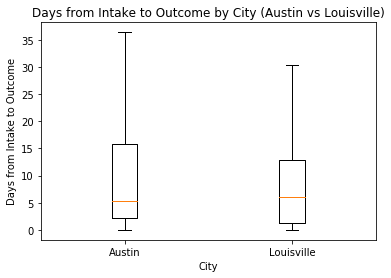

In [32]:
#save box and whiskers plot to PNG file
pyplot.savefig('figures/time_to_outcome_by_city.png')

print(f"Means:\nAustin: {round(np.mean(austin),3)}\nLouisville: {round(np.mean(louisville),3)}\n")
print(f"Standard Deviations:\nAustin: {round(np.std(austin),3)}\nLouisville: {round(np.std(louisville),3)}\n")
print(f"Medians:\nAustin: {round(np.median(austin),3)}\nLouisville: {round(np.median(louisville),3)}")

#show box and whiskers plot
pyplot.show()

In [33]:
#Is this difference significant? (Probably not, but let's check because we can)

#check for equality of variances (Levene's test)
#and then run t-test based on result

levene=stats.levene(austin,louisville)

print(f"Levene test result: p = {round(levene.pvalue,5)}")
if levene.pvalue < .05:
    print("Assume unequal variances\n\n")
    result=stats.ttest_ind(austin, louisville, equal_var=False)
else:
    print("Assume equal variances\n\n")
    result=stats.ttest_ind(austin, louisville, equal_var=True)    

print("T-test results:")
print(f"t = {round(result.statistic,4)}\nP = {round(result.pvalue,4)}")
if result.pvalue < .05:
    print(f"\nThe difference is significant.")
else:
    print(f"\nThe difference is not significant.")

#STATS SUMMARY

print("Austin has a lower median time between intake and outcome compared to Louisville (5.4 vs 6.0).")
print("\nHowever, Austin's mean time is higher (17.8 vs 13.5).\n\nThis difference was statistically significant (t=22.6, p<.01).")

Levene test result: p = 0.0
Assume unequal variances


T-test results:
t = 22.615
P = 0.0

The difference is significant.
Austin has a lower median time between intake and outcome compared to Louisville (5.4 vs 6.0).

However, Austin's mean time is higher (17.8 vs 13.5).

This difference was statistically significant (t=22.6, p<.01).


## Average Time-To-Outcome by Outcome Type

In [34]:
#Restrict our analysis to adoption, transfer, euthanasia, and death
#Adoption

austin_data=austin_df[austin_df['Outcome Type'].isin(['Adoption','Transfer','Euthanasia','Died'])]
louisville_data=louisville_df[louisville_df['OutcomeType'].isin(['ADOPTION','EUTH','TRANSFER','DIED'])]

austin_data=austin_data.rename(columns={"Outcome Type":"OutcomeType","Days from Intake to Outcome":"Days between Intake and Outcome"})

df=pd.concat([austin_data,louisville_data]).reset_index()

#Get the outcome types to be named the same things across AUS and Louisville data

df=df.replace(to_replace='ADOPTION',value='Adoption')
df=df.replace(to_replace='EUTH',value='Euthanasia')
df=df.replace(to_replace='TRANSFER',value='Transfer')
df=df.replace(to_replace='DIED',value='Died')

df['OutcomeType'].value_counts()

#create lists for boxplot showing intake times for cats vs dogs

adoption=[]
euthanasia=[]
transfer=[]
died=[]

#fill the lists
for row in range(len(df)):    
    if (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Adoption'):
        adoption.append(df.loc[row,'Days between Intake and Outcome'])
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Euthanasia'):
        euthanasia.append(df.loc[row,'Days between Intake and Outcome'])        
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Transfer'):
        transfer.append(df.loc[row,'Days between Intake and Outcome'])                
    elif (df.loc[row,'Days between Intake and Outcome']>0) & (df.loc[row,'OutcomeType']=='Died'):
        died.append(df.loc[row,'Days between Intake and Outcome'])                        
    else:
        continue

In [35]:
%%capture

#set up the figure
data=[adoption, euthanasia, transfer, died]
labels=['Adopted','Euthanized','Transferred','Died']
pyplot.boxplot(data, labels=labels, showfliers=False)
pylab.title('Days from Intake to Outcome by Outcome Type')
pylab.xlabel("Outcome Type")
pylab.ylabel("Days from Intake to Outcome")

Mean values:
Adopted: 31.134
Euthanized: 8.403
Transferred: 11.792
Died: 17.88

Standard Deviations:
Adopted: 55.158
Euthanized: 17.42
Transferred: 24.686
Died: 64.101

Medians:
Adopted: 14.18
Euthanized: 5.815
Transferred: 5.106
Died: 6.956


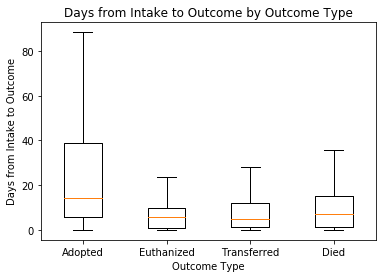

In [36]:
#save box and whiskers plot to PNG file
pyplot.savefig('figures/time_to_outcome_by_outcome_type.png')

print(f"Mean values:\nAdopted: {round(np.mean(adoption),3)}\nEuthanized: {round(np.mean(euthanasia),3)}\nTransferred: {round(np.mean(transfer),3)}\nDied: {round(np.mean(died),3)}")
print(f"\nStandard Deviations:\nAdopted: {round(np.std(adoption),3)}\nEuthanized: {round(np.std(euthanasia),3)}\nTransferred: {round(np.std(transfer),3)}\nDied: {round(np.std(died),3)}")
print(f"\nMedians:\nAdopted: {round(np.median(adoption),3)}\nEuthanized: {round(np.median(euthanasia),3)}\nTransferred: {round(np.median(transfer),3)}\nDied: {round(np.median(died),3)}")

#show box and whiskers plot
pyplot.show()


In [37]:
#ANOVA:
stats.f_oneway(adoption, euthanasia, transfer, died)

F_onewayResult(statistic=4086.9711082211779, pvalue=0.0)

## Average Time-To-Outcome by Age at Intake

In [38]:
#Plot age at intake against Days from Intake to Outcome

x=austin_df['AgeDays_intake']
y=austin_df['Days from Intake to Outcome']

len(x)
len(y)

print(f"Average age: {round(np.mean(x),2)} days")
print(f"Average time to outcome: {round(np.mean(y),2)} days")

Average age: 742.24 days
Average time to outcome: 16.86 days


In [39]:
#remove outliers

x_max=np.mean(x)+(3*np.std(x))
x_min=np.mean(x)-(3*np.std(x))
y_max=np.mean(y)+(3*np.std(y))
y_min=np.mean(y)-(3*np.std(y))

austin_data_outliers_removed=austin_df[(austin_df['AgeDays_intake'] < x_max) 
                                         & (austin_df['AgeDays_intake'] > x_min)
                                         & (austin_df['Days from Intake to Outcome'] < y_max)                                        
                                         & (austin_df['Days from Intake to Outcome'] > y_min)]

## All Animals

In [40]:
#Redefine data for analysis using subset of data without outliers
x=austin_data_outliers_removed['AgeDays_intake']
y=austin_data_outliers_removed['Days from Intake to Outcome']

#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nALL ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, although the effect size is very small")



ALL ANIMALS:
Coefficient: -0.0014329168427347167
R-squared: -0.05723070142425872
P-value: 0.0

The correlation is significant, although the effect size is very small


In [41]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("\nAge at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)\n")
pylab.title("Age vs Time to Outcome (All Animals)\n")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

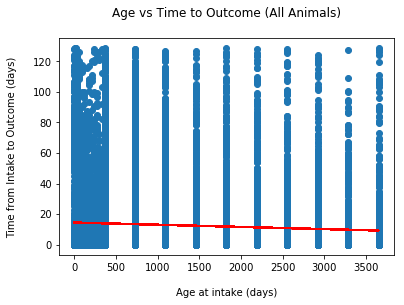

In [42]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('figures/age_vs_time_to_outcome_ALL.png')

pyplot.show()

## Adopted vs Euthanized Animals

In [43]:
#Plot separately for outcome types

austin_data_outliers_removed['Outcome Type'].value_counts()

adoption=austin_data_outliers_removed[austin_data_outliers_removed['Outcome Type']=='Adoption']
euthanasia=austin_data_outliers_removed[austin_data_outliers_removed['Outcome Type']=='Euthanasia']

In [44]:
#Age vs. Time to Outcome for Adopted animals

#Redefine data for analysis using subset of data without outliers
x=adoption['AgeDays_intake']
y=adoption['Days from Intake to Outcome']

#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nADOPTED ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, but the effect size is very small")



ADOPTED ANIMALS:
Coefficient: -0.0007430668781439317
R-squared: -0.020098228288934542
P-value: 0.002

The correlation is significant, but the effect size is very small


In [45]:
%%capture 
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("\nAge at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)\n")
pylab.title("Age vs Time to Outcome (Adopted Animals Only)\n")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

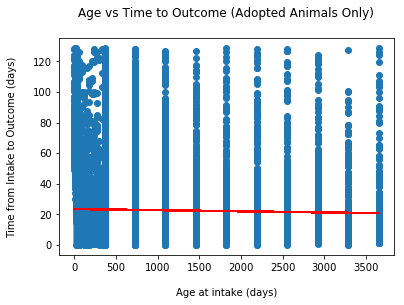

In [46]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('figures/age_vs_time_to_outcome_Adoption.png')

pyplot.show()

In [47]:
#Age vs. Time to Outcome for Euthanized animals

#Redefine data for analysis using subset of data without outliers
x=euthanasia['AgeDays_intake']
y=euthanasia['Days from Intake to Outcome']

#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nEUTHANIZED ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is not significant")



EUTHANIZED ANIMALS:
Coefficient: -0.0001183845812628215
R-squared: -0.009029294223016609
P-value: 0.661

The correlation is not significant


In [48]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("\nAge at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)\n")
pylab.title("Age vs Time to Outcome (Euthanized Animals Only)\n")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

In [49]:
print("\n\nEUTHANIZED ANIMALS:")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, although the effect size is very small")



EUTHANIZED ANIMALS:
Coefficient: -0.0001183845812628215
R-squared: -0.009029294223016609
P-value: 0.661

The correlation is significant, although the effect size is very small


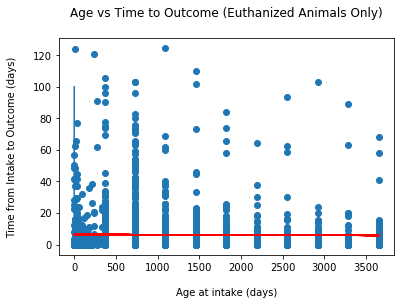

In [50]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('figures/age_vs_time_to_outcome_Euthanasia.png')

pyplot.show()

## Cats vs Dogs (Adopted animals only)

In [51]:
#Plot separately for Cats and Dogs (separate colors)

adoption['Animal Type_intake'].value_counts()

dogs=adoption[adoption['Animal Type_intake']=='Dog']
cats=adoption[adoption['Animal Type_intake']=='Cat']

In [52]:
#CATS

#Redefine data for analysis using subset of data without outliers
x=cats['AgeDays_intake']
y=cats['Days from Intake to Outcome']
#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nCATS:\n----------------")
print(f"Average age (days): {round(np.mean(x),2)}")
print(f"Median age (days): {round(np.median(x),2)}")
print(f"Average time to outcome (days): {round(np.mean(y),2)}")
print(f"Median time to outcome (days): {round(np.median(y),2)}")
print("\nRegression model:")
print(f"Coefficient: {round(coefficient,3)}")
print(f"R-squared: {round(r_squared,3)}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, but the effect size is small")
print("\nFor CATS, younger animals are generally adopted less quickly than older animals")



CATS:
----------------
Average age (days): 283.81
Median age (days): 30.0
Average time to outcome (days): 31.76
Median time to outcome (days): 24.43

Regression model:
Coefficient: -0.002
R-squared: -0.039
P-value: 0.0

The correlation is significant, but the effect size is small

For CATS, younger animals are generally adopted less quickly than older animals


In [53]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("Age at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)")
pylab.title("Age vs Time to Outcome (Cats Only)")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

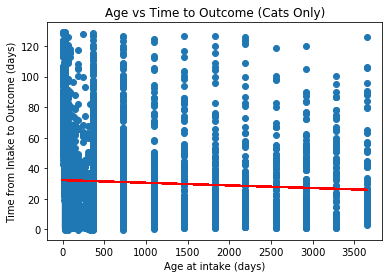

In [54]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('figures/age_vs_time_to_outcome_Cats.png')

pyplot.show()

In [55]:
#CATS

#Redefine data for analysis using subset of data without outliers
x=dogs['AgeDays_intake']
y=dogs['Days from Intake to Outcome']
#Regression
coefficient,intercept,r_squared,p_value,std_err=stats.linregress(x,y)    

print("\n\nDOGS:\n----------------")
print(f"Average age (days): {round(np.mean(x),2)}")
print(f"Median age (days): {round(np.median(x),2)}")
print(f"Average time to outcome (days): {round(np.mean(y),2)}")
print(f"Median time to outcome (days): {round(np.median(y),2)}")
print("\nRegression model:")
print(f"Coefficient: {round(coefficient,3)}")
print(f"R-squared: {round(r_squared,3)}")
print(f"P-value: {round(p_value,3)}")
print("\nThe correlation is significant, but the effect size is small")
print("\nFor DOGS, younger animals are generally adopted more quickly than older animals")



DOGS:
----------------
Average age (days): 601.17
Median age (days): 365.0
Average time to outcome (days): 16.35
Median time to outcome (days): 6.23

Regression model:
Coefficient: 0.004
R-squared: 0.124
P-value: 0.0

The correlation is significant, but the effect size is small

For DOGS, younger animals are generally adopted more quickly than older animals


In [56]:
%%capture
pyplot.scatter(x,y)
pyplot.plot([1,100])
pylab.xlabel("Age at intake (days)")
pylab.ylabel("Time from Intake to Outcome (days)")
pylab.title("Age vs Time to Outcome (Dogs Only)")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pyplot.plot(x,p(x),"r--")

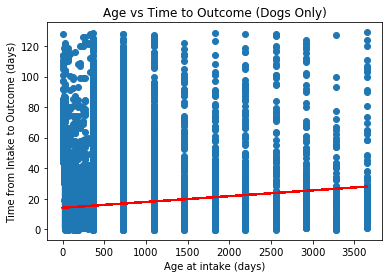

In [57]:
#Save and Draw Plots
#Age vs. Time to Outcome for Euthanized animals
pyplot.savefig('figures/age_vs_time_to_outcome_Dogs.png')

pyplot.show()